In [1]:
from mdagent import MDAgent
import os 
import mdtraj as md

In [2]:
descriptive_prompt_10 =  "Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Tell me how many residues are in the chains and beta sheets. 3. Simulate for 1 ps at 300 K. 4. Compute the RMSD of the simulation at 300 K. 5. Compute the radius of gyration over time for the simulation at 300 K. 6. Compute the SASA (solvent accessible surface area) for the simulation at 300 K. 7. Simulate for 1 ps at 400 K. 8. Compute the RMSD of the simulation at 400 K. 9. Compute the radius of gyration over time for the simulation at 400 K. 10. Compute the SASA (solvent accessible surface area) for the simulation at 400 K."
non_descriptive_prompt_10 = "Simulate 1LYZ for 1 ps at 300K and 400K. Tell me how many residues are in the chains and beta sheets, and compute the RMSD, SASA, and radius of gyration of both simulations."

Required Tasks:
- Download
- SS Analysis
- Simulation_1
- RMSD_1
- Rgy_1
- SASA_1
- Simulation_2
- RMSD_2
- Rgy_2
- SASA_2

In [3]:
llm_model = "claude-3-opus-20240229"
tools = "all"

In [4]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools)
agent_1.run(descriptive_prompt_10)

Thought: To complete the tasks, I will first download the PDB file 1LYZ. Then I will analyze the structure to determine the number of residues in the chains and beta sheets. Next, I will run two simulations at different temperatures (300K and 400K) for 1ps each. For each simulation, I will compute the RMSD, radius of gyration over time, and solvent accessible surface area (SASA). I will use the appropriate tools to perform each task.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1LYZ"
}
```PDB file found with this ID: 1LYZ
Here are the next steps to complete the requested tasks:

Thought: Now that I have downloaded the PDB file for 1LYZ, I will analyze the structure to determine the number of residues in the chains and beta sheets using the GetTurnsBetaSheetsHelices tool.

Action:
```
{
  "action": "GetTurnsBetaSheetsHelices",
  "action_input": {
    "query": "1LYZ", 
    "primary_accession": "P00720"
  }
}
```The primary accession number provided does not match an

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [7]:
registry = agent_1.path_registry
print(registry.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_233636: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_233636
 rec0_233650: dssp values for trajectory with id: 1LYZ_233636
 1LYZ_233711: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_233719: Initial positions for simulation sim0_233719
 sim0_233719: Basic Simulation of Protein 1LYZ_233711
 rec0_233719: Simulation trajectory for protein 1LYZ_233711 and simulation sim0_233719
 rec1_233719: Simulation state log for protein 1LYZ_233711 and simulation sim0_233719
 rec2_233719: Simulation pdb frames for protein 1LYZ_233711 and simulation sim0_233719
 rmsd_233719: RMSD for 233719
 fig0_233757: RMSD plot for 233719
 rgy_rec0_233719: Radii of gyration per frame for rec0_233719
 sasa_1LYZ: Total SASA values for 1LYZ
 fig0_233850: Plot of SASA over time for 1LYZ
 top_sim0_233921: Initial positions for simulation sim0_233921
 sim0_2339

In [9]:
traj_path_1 = registry.get_mapped_path("rec0_233719")
top_path_1 = registry.get_mapped_path("top_sim0_233719")

assert os.path.exists(registry.get_mapped_path("1LYZ_233636"))
assert os.path.exists(traj_path_1)
assert os.path.exists(top_path_1)
assert os.path.exists(registry.get_mapped_path('rmsd_233719'))
assert os.path.exists(registry.get_mapped_path('rgy_rec0_233719'))
assert os.path.exists(registry.get_mapped_path('sasa_1LYZ'))

traj_path_2 = registry.get_mapped_path("rec0_233921")
top_path_2 = registry.get_mapped_path("top_sim0_233921")
assert os.path.exists(traj_path_2)
assert os.path.exists(top_path_2)
assert os.path.exists(registry.get_mapped_path('rmsd_233921'))
assert os.path.exists(registry.get_mapped_path('rgy_rec0_233921'))
# assert os.path.exists(registry.get_mapped_path('sasa_file_path'))

In [17]:
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry)
dssp._run(traj_file= "1LYZ_233636", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

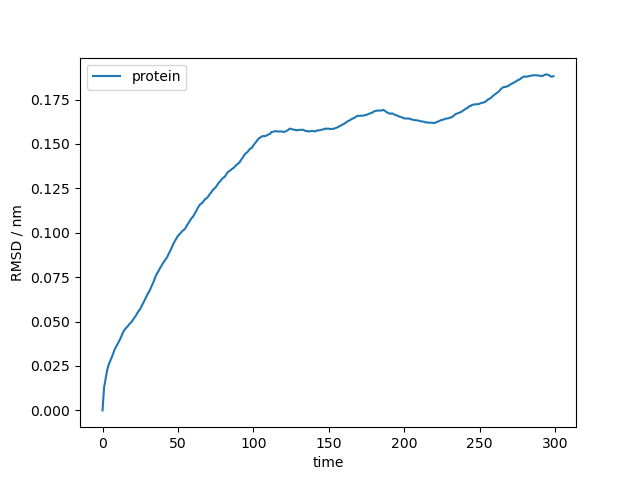

In [18]:
#plot rmsd
from IPython.display import Image
Image(filename=registry.get_mapped_path('fig0_233757'))

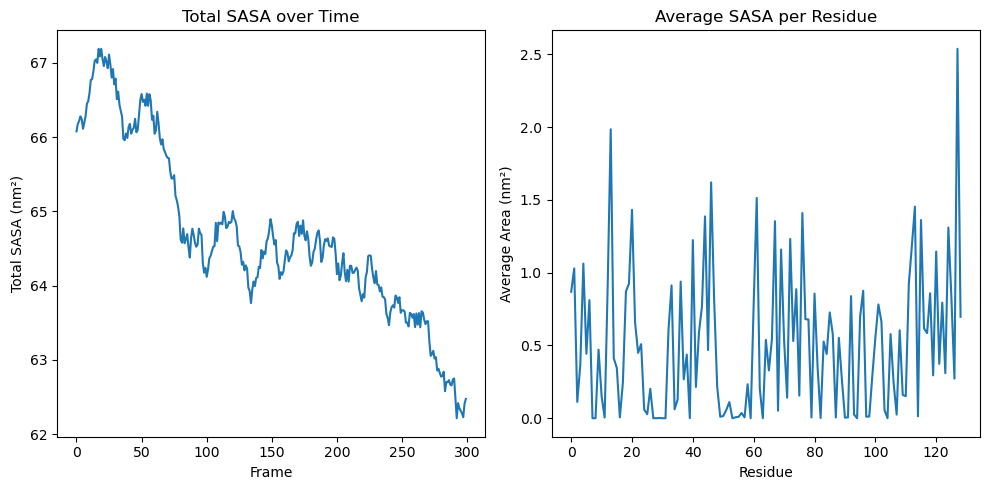

In [19]:
#plot sasa
from IPython.display import Image
Image(filename=registry.get_mapped_path('fig0_233850'))

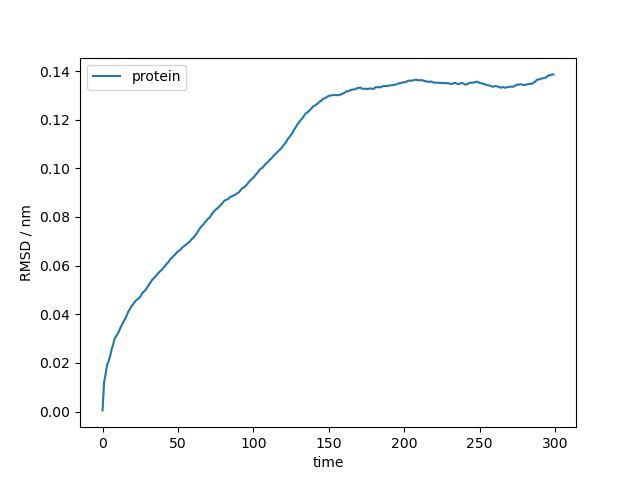

In [20]:
#plot rmsd
from IPython.display import Image
Image(filename=registry.get_mapped_path('fig0_234038'))

In [21]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools)
agent_2.run(non_descriptive_prompt_10)

Thought: To simulate 1LYZ at 300K and 400K for 1 ps each, I will first need to download the PDB file. Then I can set up and run the simulations using the SetUpandRunFunction tool. After the simulations are complete, I can analyze the trajectories to get the requested information.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1LYZ"
}
```

PDB file found with this ID: 1LYZ
Thought: Now that I have the PDB file for 1LYZ, I can set up and run the 300K simulation using the SetUpandRunFunction tool. I'll modify the default parameters to run for 1 ps (500 steps) and save the results.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1LYZ_000444",
    "forcefield_files": ["amber14/protein.ff14SB.xml", "amber14/tip3p.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "PME", 
      "nonbondedCutoff": 1.0,
      "constraints": "HBonds",
      "rigidWater": true,
      "constraintTolerance": 0.000001,
      "ewaldErrorTo

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [22]:
registry = agent_2.path_registry
print(registry.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_000444: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_000444
 1LYZ_000514: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_000529: Initial positions for simulation sim0_000529
 sim0_000529: Basic Simulation of Protein 1LYZ_000514
 rec0_000541: Simulation trajectory for protein 1LYZ_000514 and simulation sim0_000529
 rec1_000541: Simulation state log for protein 1LYZ_000514 and simulation sim0_000529
 rec2_000541: Simulation pdb frames for protein 1LYZ_000514 and simulation sim0_000529
 top_sim0_001147: Initial positions for simulation sim0_001147
 sim0_001147: Basic Simulation of Protein 1LYZ_000514
 rec0_001205: Simulation trajectory for protein 1LYZ_000514 and simulation sim0_001147
 rec1_001205: Simulation state log for protein 1LYZ_000514 and simulation sim0_001147
 rec2_001205: Simulation pdb frames for protein 1LYZ_0005

In [24]:
traj_path_1 = registry.get_mapped_path("rec0_000541")
top_path_1 = registry.get_mapped_path("top_sim0_000529")

assert os.path.exists(registry.get_mapped_path("1LYZ_000514"))
assert os.path.exists(traj_path_1)
assert os.path.exists(top_path_1)
assert os.path.exists(registry.get_mapped_path('rmsd_1LYZ 300K'))
# assert os.path.exists(registry.get_mapped_path('rgy_file_path'))
assert os.path.exists(registry.get_mapped_path('sasa_1LYZ 300K'))

traj_path_2 = registry.get_mapped_path("rec0_001205")
top_path_2 = registry.get_mapped_path("top_sim0_001147")
assert os.path.exists(traj_path_2)
assert os.path.exists(top_path_2)
assert os.path.exists(registry.get_mapped_path('rmsd_1LYZ 400K'))
# assert os.path.exists(registry.get_mapped_path('rgy_file_path'))
# assert os.path.exists(registry.get_mapped_path('sasa_file_path'))

In [25]:
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry)
dssp._run(traj_file= "1LYZ_000514", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 0}"

In [29]:
dssp._run(traj_file="rec0_000541",top_file="top_sim0_000529",target_frames="all")

"{'residues in helix': 1542, 'residues in strand': 400, 'residues in coil': 1928, 'residues not assigned, not a protein residue': 203760}"

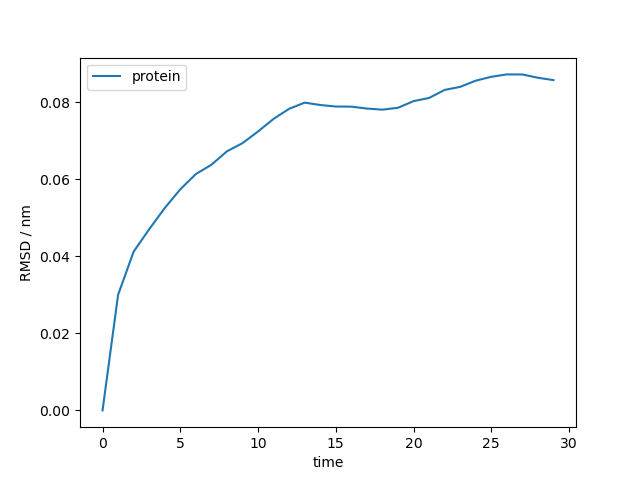

In [26]:
#plot rmsd
from IPython.display import Image
Image(filename=registry.get_mapped_path('fig0_002057'))

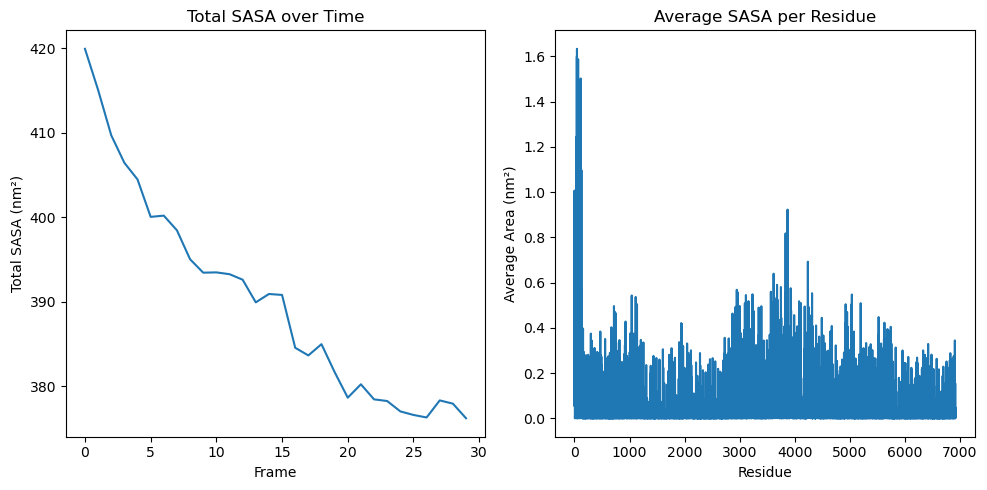

In [27]:
#plot sasa
from IPython.display import Image
Image(filename=registry.get_mapped_path('fig0_002430'))

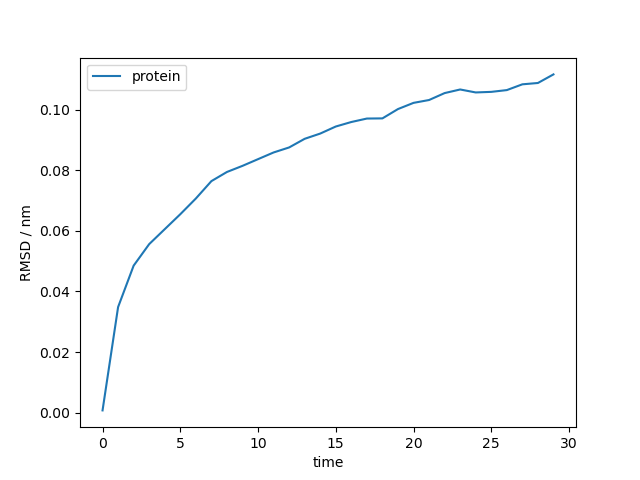

In [28]:
#plot sasa
from IPython.display import Image
Image(filename=registry.get_mapped_path('fig0_002111'))